# Electromyography (EMG) Processing Pipeline in *Python*

Created on 20201.7.10 by Rain. This notebook this for the physiological data processing of the VR Emotion project

The raw data we will use were obtained from BIOPAC MP160, and first exported in a mat format for segmentation.

Generally, I think the biosinal processing pipeline are basically the same for different kind of data, while the feature extraction can be different. 

In this script, the ECG analysis are mainly conducted by neurokit2, for preprocessing and feature extraction.
Overview:
Step 1: Dependcies and raw data import
Step 2: Extract the specific modality(if your data is multumodality) and downsampling accordingly
Step 3: Filter

# Step 1: Import raw data

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
data = loadmat('F:/1_Emotion_Data/Physiology/Helpless/sub_001_helpless_1.mat')
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

In [2]:
# Let's take a look of our current dataset
print(data);print(type(data));print(data.keys());

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Jun 21 13:57:21 2021', '__version__': '1.0', '__globals__': [], 'ecg_hl1': array([[0.07568359],
       [0.07614136],
       [0.0769043 ],
       ...,
       [0.04180908],
       [0.04226685],
       [0.04364014]]), 'eda_hl1': array([[11.65466267],
       [11.6592403 ],
       [11.65466267],
       ...,
       [11.64703327],
       [11.64703327],
       [11.64398151]]), 'emg_hl1': array([[ 0.00457764],
       [ 0.00030518],
       [-0.01846313],
       ...,
       [-0.00091553],
       [ 0.00045776],
       [ 0.00091553]]), 'emgc_hl1': array([[1.08489990e-04],
       [9.27734375e-05],
       [8.66699219e-05],
       ...,
       [4.30297852e-05],
       [3.71551514e-05],
       [3.39508057e-05]]), 'hr_hl1': array([[83.79888268],
       [83.79888268],
       [83.79888268],
       ...,
       [85.04606662],
       [85.04606662],
       [85.04606662]]), 'ppg_hl1': array([[-0.00091553],
       [-0.00091553],
       [-0.

In [3]:
# Primarily, we can see that within each mat file, the multimodality physiological data were stored into a numpy array individually

# Step 2: Flatten data array & Downsampling accordingly 

In [3]:
emg=data['emg_hl1'];emg.shape;emg=np.ndarray.flatten(emg);emg.shape ## For downsampling and further processing, we should flatten the 2-D array into a 1-D array

(216001,)

In [4]:
# Downsampling acorrdingly by using the signal_resample function
emg = nk.signal_resample(emg, method="numpy",sampling_rate=2000, desired_sampling_rate=1000)

In [5]:
emg.shape

(108000,)

# Step 3: Clean the raw EMG signal

In [32]:
# Clean the raw signal by using the emg_clean function
emg_cleaned=nk.emg_clean(emg,sampling_rate=1000)

# Step 4: Calcaulate the EMG signal amplitude

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

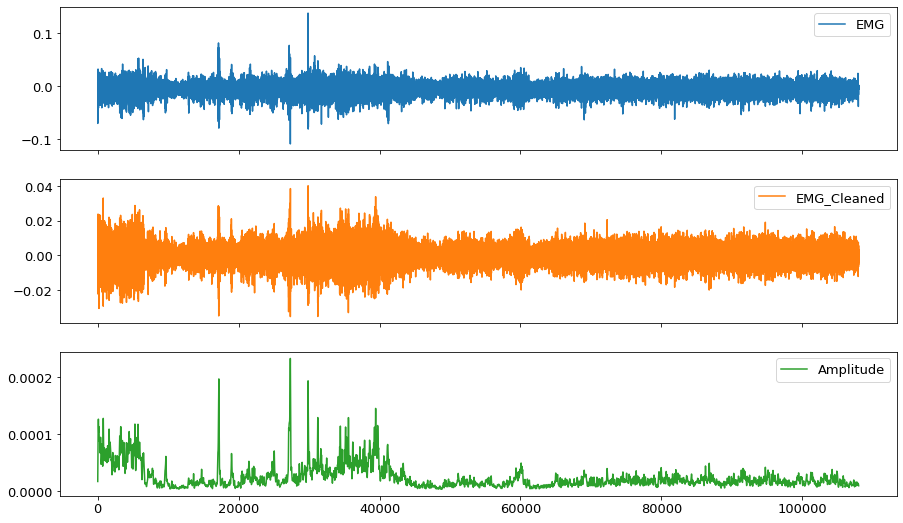

In [34]:
# Compute the amplitude by using function: emg_amplitude
emg_amplitude=nk.emg_amplitude(emg_cleaned)
fig = pd.DataFrame({"EMG": emg, "EMG_Cleaned": emg_cleaned, "Amplitude": emg_amplitude}).plot(subplots=True)
fig


# Step 5: Detect signal onset based on EMG threshold

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\neurokit2\events\events_find.py:92: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(


,EMG_Activity,EMG_Onsets,EMG_Offsets
0,0.0,0,0
1,0.0,0,0
2,0.0,0,0
3,0.0,0,0
4,0.0,0,0
...,...,...,...
107995,0.0,0,0
107996,0.0,0,0
107997,0.0,0,0
107998,0.0,0,0


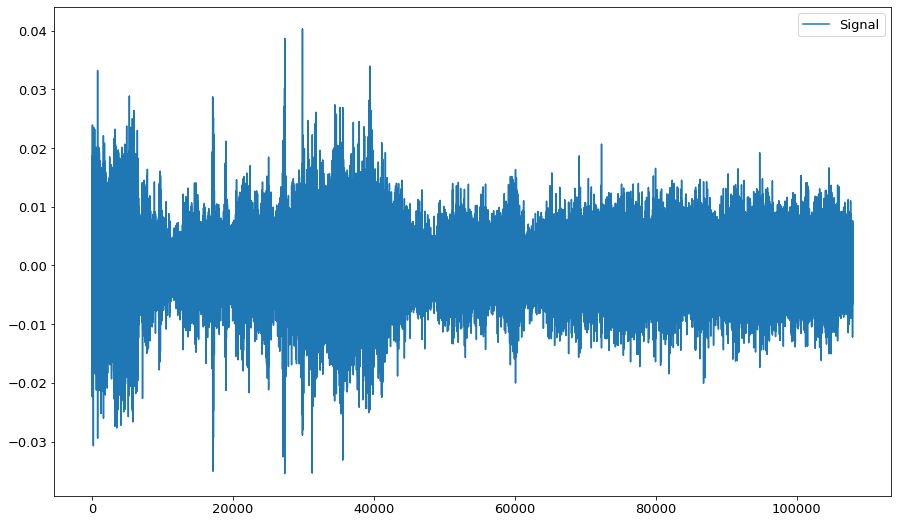

In [35]:
activity, info = nk.emg_activation(emg_amplitude=emg_amplitude, sampling_rate=1000, method="mixture")
fig = nk.events_plot([info["EMG_Offsets"], info["EMG_Onsets"]], emg_cleaned)
fig; activity

# Step 6: Aggregate the result and display

In [36]:
signals=pd.DataFrame({"EMG_Raw":emg,"EMG_Clean":emg_cleaned,"EMG_Amplitude":emg_amplitude})
signals=pd.concat([signals,activity],axis=1)
signals

,EMG_Raw,EMG_Clean,EMG_Amplitude,EMG_Activity,EMG_Onsets,EMG_Offsets
0,0.004578,-0.000197,0.000017,0.0,0,0
1,-0.018463,0.004000,0.000019,0.0,0,0
2,-0.061646,-0.016108,0.000021,0.0,0,0
3,-0.070496,-0.009321,0.000024,0.0,0,0
4,-0.070343,-0.002604,0.000026,0.0,0,0
...,...,...,...,...,...,...
107995,-0.004120,-0.001113,0.000010,0.0,0,0
107996,-0.006104,-0.003592,0.000010,0.0,0,0
107997,-0.003510,-0.001714,0.000010,0.0,0,0
107998,-0.001831,-0.001074,0.000010,0.0,0,0


KeyError: -1

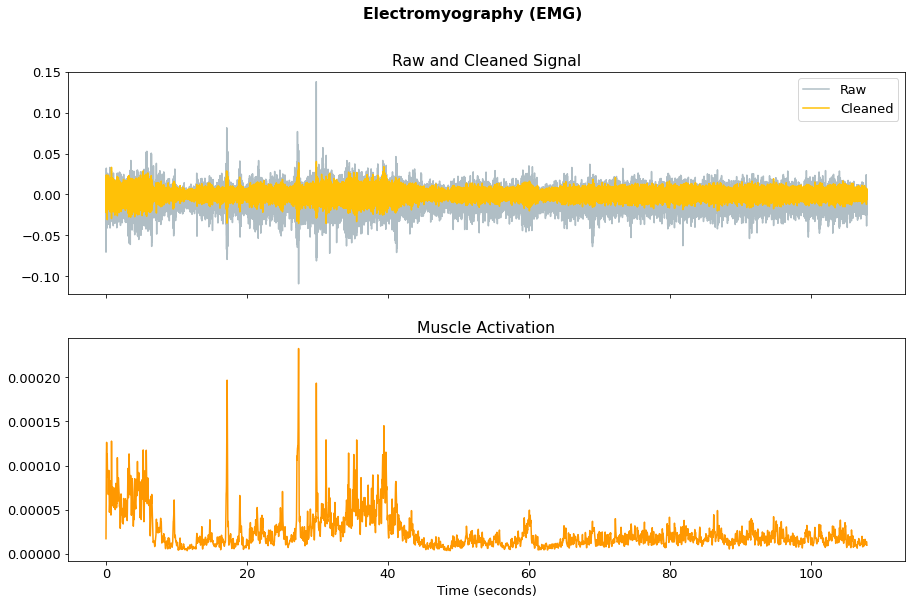

In [37]:
nk.emg_plot(signals,sampling_rate=1000)

# Step 7: Interval related feature extraction

In [38]:
emg_features = nk.emg_intervalrelated(signals)

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\neurokit2\emg\emg_intervalrelated.py:60: RuntimeWarning: Mean of empty slice.
  intervals["Amplitude_Mean"] = data_bursts["EMG_Amplitude"].values.mean()
C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [42]:
a,b = nk.emg_process(emg, sampling_rate=2000)

C:\Users\Lenovo\anaconda3\envs\EEG\lib\site-packages\neurokit2\events\events_find.py:92: NeuroKitWarning: No events found. Check your event_channel or adjust 'threshold' or 'keep' arguments.
  warn(
